<a href="https://colab.research.google.com/github/BenjaAR/SEM12_AQUINO_REYES_MD/blob/main/SEM12_AQUINO_REYES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SEMANA 12: DISTRIBUCIONES DE PROBABILIDAD A PRIORI Y POSTERIORI

In [1]:
# prompt: conectar con drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# prompt: CARGAR UN ARCHIVO CSV DE MI DRIVE

import pandas as pd

# Reemplaza 'ruta/a/tu/archivo.csv' con la ruta real de tu archivo CSV en Google Drive
file_path = '/content/drive/MyDrive/Tecsup/5° Ciclo - 2025 - I/Minería de Datos/SEM12/obesidad.csv'

df = pd.read_csv(file_path)
print("Archivo CSV cargado exitosamente:")
print(df.head()) # Muestra las primeras filas del DataFrame

Archivo CSV cargado exitosamente:
   Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0  Female   21    1.62    64.0                            yes   no     2    3   
1  Female   21    1.52    56.0                            yes   no     3    3   
2    Male   23    1.80    77.0                            yes   no     2    3   
3    Male   27    1.80    87.0                             no   no     3    3   
4    Male   22    1.78    89.8                             no   no     2    1   

        CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0  Sometimes    no     2   no    0    1          no  Public_Transportation   
1  Sometimes   yes     3  yes    3    0   Sometimes  Public_Transportation   
2  Sometimes    no     2   no    2    1  Frequently  Public_Transportation   
3  Sometimes    no     2   no    2    0  Frequently                Walking   
4  Sometimes    no     2   no    0    0   Sometimes  Public_Transportation   

          

In [4]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.4,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.7,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.7,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.3,yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
# Diccionario de mapeo para las nuevas columnas descriptivas
column_map = {
    'Gender': 'Género',
    'Age': 'Edad',
    'Height': 'Estatura',
    'Weight': 'Peso',
    'family_history_with_overweight': 'Historia_familiar_con_sobrepeso',
    'FAVC': 'Consumo_aceite',
    'FCVC': 'Frecuencia_comida_rápida',
    'NCP': 'Número_comidas_principales',
    'CAEC': 'Consumo_alcohol',
    'SMOKE': 'Fuma',
    'CH2O': 'Consumo_agua',
    'SCC': 'Toma_suplementos',
    'FAF': 'Actividad_física',
    'TUE': 'Uso_televisión',
    'CALC': 'Consumo_lácteos',
    'MTRANS': 'Medio_transporte',
    'NObeyesdad': 'Clasificación_sobrepeso'
}

# Cambiar los nombres de las columnas en el dataframe
df = df.rename(columns=column_map)



In [7]:
df

,Género,Edad,Estatura,Peso,Historia_familiar_con_sobrepeso,Consumo_aceite,Frecuencia_comida_rápida,Número_comidas_principales,Consumo_alcohol,Fuma,Consumo_agua,Toma_suplementos,Actividad_física,Uso_televisión,Consumo_lácteos,Medio_transporte,Clasificación_sobrepeso
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.4,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.7,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.7,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.3,yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III


In [9]:
# Verifica los nombres de las columnas
print(df.columns)

Index(['Género', 'Edad', 'Estatura', 'Peso', 'Historia_familiar_con_sobrepeso',
       'Consumo_aceite', 'Frecuencia_comida_rápida',
       'Número_comidas_principales', 'Consumo_alcohol', 'Fuma', 'Consumo_agua',
       'Toma_suplementos', 'Actividad_física', 'Uso_televisión',
       'Consumo_lácteos', 'Medio_transporte', 'Clasificación_sobrepeso'],
      dtype='object')


In [10]:
# Si las columnas existen, puedes crear el nuevo dataframe de la siguiente manera:
new_df = df[['Clasificación_sobrepeso', 'Edad', 'Estatura', 'Peso']]

In [11]:
# Mostrar el nuevo dataframe
print(new_df)

     Clasificación_sobrepeso  Edad  Estatura   Peso
0              Normal_Weight    21      1.62   64.0
1              Normal_Weight    21      1.52   56.0
2              Normal_Weight    23      1.80   77.0
3         Overweight_Level_I    27      1.80   87.0
4        Overweight_Level_II    22      1.78   89.8
...                      ...   ...       ...    ...
2106        Obesity_Type_III    21      1.71  131.4
2107        Obesity_Type_III    22      1.75  133.7
2108        Obesity_Type_III    23      1.75  133.7
2109        Obesity_Type_III    24      1.74  133.3
2110        Obesity_Type_III    24      1.74  133.5

[2111 rows x 4 columns]


In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Clasificación_sobrepeso  2111 non-null   object 
 1   Edad                     2111 non-null   int64  
 2   Estatura                 2111 non-null   float64
 3   Peso                     2111 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 66.1+ KB


In [15]:
# Seleccionar las columnas numéricas para la matriz de correlación
df_numeric = df[['Edad', 'Estatura', 'Peso']]

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

              Edad  Estatura      Peso
Edad      1.000000 -0.025775  0.203443
Estatura -0.025775  1.000000  0.462283
Peso      0.203443  0.462283  1.000000


Text(0, 0.5, 'Cantidad')

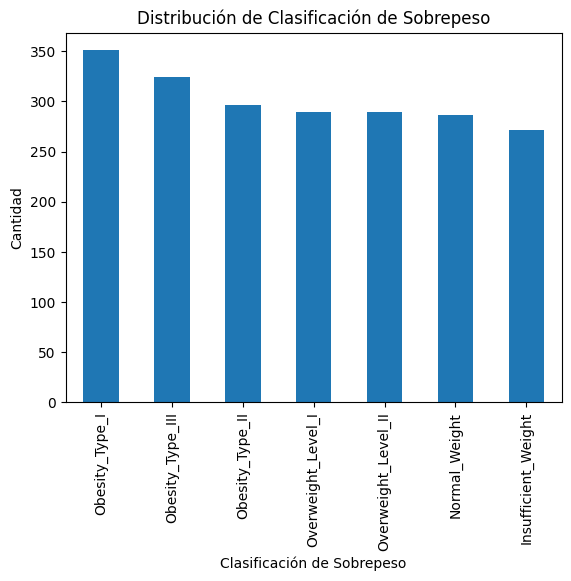

In [16]:
import matplotlib.pyplot as plt

# Contar las ocurrencias de cada categoría en 'Clasificación_sobrepeso'
df['Clasificación_sobrepeso'].value_counts().plot(kind='bar')

# Títulos y etiquetas
plt.title('Distribución de Clasificación de Sobrepeso')
plt.xlabel('Clasificación de Sobrepeso')
plt.ylabel('Cantidad')

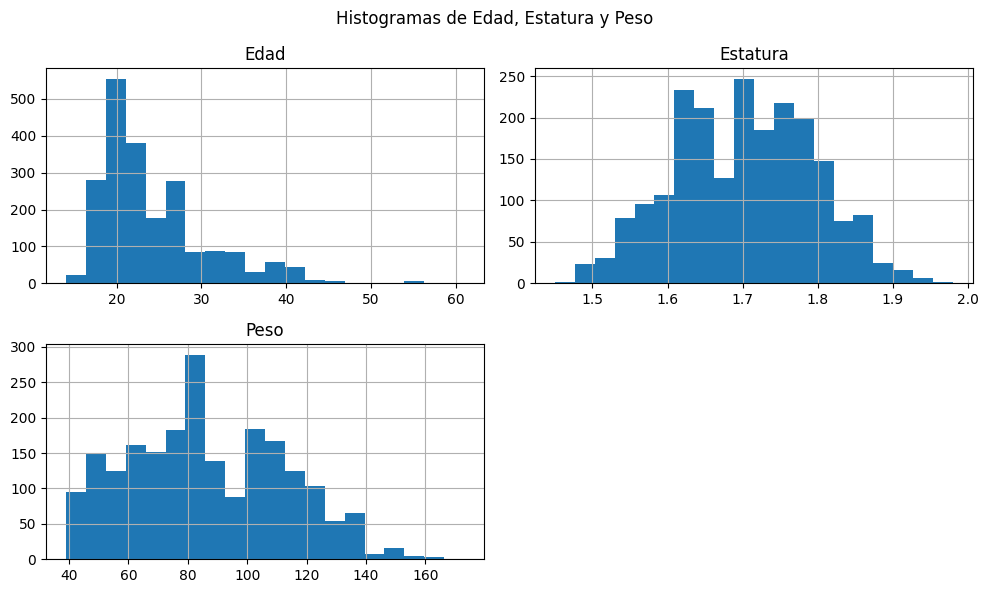

In [17]:
# Seleccionamos las columnas numéricas
df_numeric = df[['Edad', 'Estatura', 'Peso']]

# Crear histogramas para cada columna
df_numeric.hist(bins=20, figsize=(10, 6))

# Títulos y etiquetas
plt.suptitle('Histogramas de Edad, Estatura y Peso')
plt.tight_layout()
plt.show()

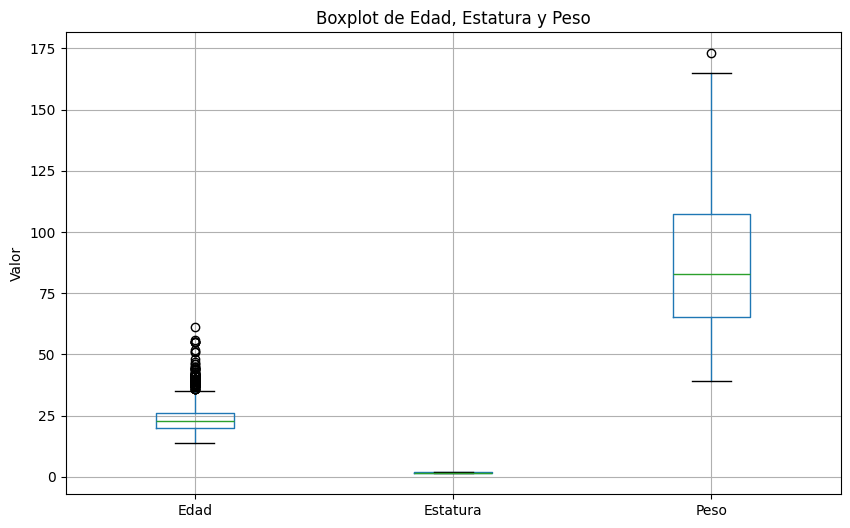

In [18]:
# Seleccionamos las columnas numéricas
df_numeric = df[['Edad', 'Estatura', 'Peso']]

# Crear boxplots para cada columna
df_numeric.boxplot(figsize=(10, 6))

# Títulos y etiquetas
plt.title('Boxplot de Edad, Estatura y Peso')
plt.ylabel('Valor')
plt.xticks([1, 2, 3], ['Edad', 'Estatura', 'Peso'])

# Mostrar el gráfico
plt.show()


In [21]:
new_df.isnull().sum()

,0
Clasificación_sobrepeso,0
Edad,0
Estatura,0
Peso,0


In [22]:
!pip install category-encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.3 MB/s eta 0:00:00


In [23]:
import category_encoders as ce

# Crear el codificador OneHotEncoder
encoder = ce.OneHotEncoder(cols=['Clasificación_sobrepeso'], use_cat_names=True)

# Aplicar el codificador a la columna categórica
new_df_encoded = encoder.fit_transform(new_df)

In [24]:
# Mostrar el dataframe transformado
new_df_encoded.head()

,Clasificación_sobrepeso_Normal_Weight,Clasificación_sobrepeso_Overweight_Level_I,Clasificación_sobrepeso_Overweight_Level_II,Clasificación_sobrepeso_Obesity_Type_I,Clasificación_sobrepeso_Insufficient_Weight,Clasificación_sobrepeso_Obesity_Type_II,Clasificación_sobrepeso_Obesity_Type_III,Edad,Estatura,Peso
0,1,0,0,0,0,0,0,21,1.62,64.0
1,1,0,0,0,0,0,0,21,1.52,56.0
2,1,0,0,0,0,0,0,23,1.80,77.0
3,0,1,0,0,0,0,0,27,1.80,87.0
4,0,0,1,0,0,0,0,22,1.78,89.8


In [27]:
new_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 10 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Clasificación_sobrepeso_Normal_Weight        2111 non-null   int64  
 1   Clasificación_sobrepeso_Overweight_Level_I   2111 non-null   int64  
 2   Clasificación_sobrepeso_Overweight_Level_II  2111 non-null   int64  
 3   Clasificación_sobrepeso_Obesity_Type_I       2111 non-null   int64  
 4   Clasificación_sobrepeso_Insufficient_Weight  2111 non-null   int64  
 5   Clasificación_sobrepeso_Obesity_Type_II      2111 non-null   int64  
 6   Clasificación_sobrepeso_Obesity_Type_III     2111 non-null   int64  
 7   Edad                                         2111 non-null   int64  
 8   Estatura                                     2111 non-null   float64
 9   Peso                                         2111 non-null   float64
dtype

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score

# Características (sin las columnas de clasificación de sobrepeso)
X = new_df_encoded.drop(columns=['Clasificación_sobrepeso_Normal_Weight',
                                 'Clasificación_sobrepeso_Overweight_Level_I',
                                 'Clasificación_sobrepeso_Overweight_Level_II',
                                 'Clasificación_sobrepeso_Obesity_Type_I',
                                 'Clasificación_sobrepeso_Insufficient_Weight',
                                 'Clasificación_sobrepeso_Obesity_Type_II',
                                 'Clasificación_sobrepeso_Obesity_Type_III'])

# Variable objetivo (utilizando una de las clases de sobrepeso)
y = new_df_encoded['Clasificación_sobrepeso_Obesity_Type_III']  # Ejemplo con la columna 'Obesity_Type_III'

# Separar los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Modelos de Naive Bayes
gnb = GaussianNB()
mnb = MultinomialNB()

# Entrenamiento y evaluación de GaussianNB
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

# Entrenamiento y evaluación de MultinomialNB
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)


In [30]:

# Comparar los resultados
print(f'Accuracy de GaussianNB: {accuracy_gnb:.4f}')
print(f'Accuracy de MultinomialNB: {accuracy_mnb:.4f}')

# Comparar cuál modelo tiene mejor desempeño
if accuracy_gnb > accuracy_mnb:
    print("El modelo de GaussianNB tuvo un mejor desempeño.")
else:
    print("El modelo de MultinomialNB tuvo un mejor desempeño.")

Accuracy de GaussianNB: 0.9243
Accuracy de MultinomialNB: 0.8345
El modelo de GaussianNB tuvo un mejor desempeño.


# Conclusiones

En este análisis, comparamos el desempeño de dos modelos de Naive Bayes, **GaussianNB** y **MultinomialNB**, utilizando un conjunto de datos para predecir la clasificación de sobrepeso.

- **Accuracy de GaussianNB**: 0.9243
- **Accuracy de MultinomialNB**: 0.8345

Los resultados muestran que el modelo **GaussianNB** tuvo un mejor desempeño en comparación con el modelo **MultinomialNB**, con un **accuracy** significativamente más alto de 92.43% frente al 83.45% obtenido con el modelo multinomial.

Esto sugiere que el modelo **GaussianNB** se adapta mejor a los datos utilizados, lo que podría ser debido a la distribución gaussiana de las características numéricas en el conjunto de datos. En contraste, el **MultinomialNB**, que es más adecuado para datos discretos o de conteo, no tuvo un rendimiento tan alto en este caso.